### Fireflies

Don't you like how fireflies light up? If you want to see them on your computer, you can do that with a little bit of code. Usually, fireflies are green but we can make them be a few different colors.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import animation, rc
from IPython.display import HTML

from scipy.integrate import odeint

from matplotlib.pyplot import cm
#plt.style.use('dark_background')

In [3]:
def Kuramoto(theta,t, omega, K):
    'derivatives in the kuramoto model'
    N = len(theta)
    dtheta = np.zeros(N)
    for i in range(N):
        dtheta[i] = omega[i] + (K/N)*np.sum(np.sin(theta-theta[i]))
    return dtheta


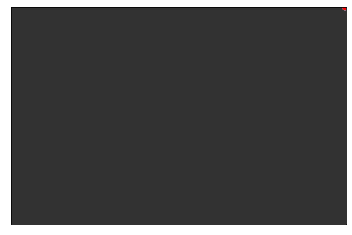

In [19]:
N = 10 #number of oscillators
K = 0.35 #coupling


x1 = np.ones(N)
x0 = np.linspace(0,2*np.pi,N)
v0 = np.ones(N) # initial state (equilibrium)
#x0[19] += 0.01 # add small perturbation to 20th variable
shuffled_list = np.linspace(0, 1, len(x0))
random.shuffle(shuffled_list)
t = np.arange(0.0, 30.0, 0.01)

x = odeint(Kuramoto,x0,t, args =(v0,K))
x_locations = [np.random.rand() for i in range(len(x0))]
y_locations = [np.random.rand() for i in range(len(x0))]

color = cm.rainbow(np.linspace(0, 1, len(x0)))
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0, 1))
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_facecolor((0.1975,0.1975, 0.1975))
#ax.axis('off')
#ax.set_facecolor('xkcd:salmon')


line = ax.scatter(x1, x1, c = shuffled_list,  cmap="rainbow")

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    current_locations = x[i]
    k = 0
    x_location_list = []
    y_location_list = []
    k_list = []
    for each_dot in current_locations:
        if np.linalg.norm(each_dot%(2*np.pi)) < 0.13:
            x_location_list += [x_locations[k]]
            y_location_list += [y_locations[k]]
            k_list += [k]
        k += 1
    line.set_offsets(np.transpose(np.array([x_location_list, y_location_list])))
    line.set_array(shuffled_list[k_list])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=2200, interval=8, blit=False)



In [20]:
HTML(anim.to_html5_video())

In [21]:
rc('animation', html='html5')

In [22]:
anim

Can you see a pattern in their lights? Don't they repeat? That means they are periodic (they repeat after a period of time).

Things that are periodic can be put into a circle. In the videos below, we see one firefly both in our real space and in our "circle space".

<ipython-input-23-d9950a29e4ae>:51: RuntimeWarning: invalid value encountered in true_divide
  line_r = axr.scatter(x0/x0, x0/x0, c = shuffled_list,  cmap="rainbow")


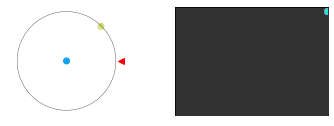

In [23]:
N = 10 #number of oscillators
K = 0.3 #coupling


x1 = np.ones(N)
x0 = np.linspace(0,2*np.pi,N)
v0 = np.ones(N) # initial state (equilibrium)
#x0[19] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 30.0, 0.01)

x = odeint(Kuramoto,x0,t, args =(v0,K))
x_locations = [np.random.rand() for i in range(len(x0))]
y_locations = [2*(np.random.rand()-0.5) for i in range(len(x0))]

shuffled_list = np.linspace(0, 1, len(x0))
random.shuffle(shuffled_list)

color = cm.rainbow(shuffled_list)


fig1, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
   # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
#xr.set_box_aspect(2 )
axr.set_xlim(( 0, 1))
axr.set_ylim((-1, 1))
axl.set_xlim(( -1.2, 1.3))
axl.set_ylim((-1.1, 1.1))

axr.yaxis.set_visible(False)
axr.xaxis.set_visible(False)
axr.set_facecolor((0.1975,0.1975, 0.1975))
axl.yaxis.set_visible(False)
axl.xaxis.set_visible(False)
axl.axis('off')
#axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
circle_x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(circle_x), np.sin(circle_x), "k", lw=0.3)
point1, = axl.plot(1.1, 0, "<",c = 'r')
#line_l = axl.scatter([0.5], [0.5], cmap="rainbow")
line_l = axl.scatter(x0, x0, c =shuffled_list,  cmap="rainbow")

# draw full curve to set view limits in right Axes
#sine, = axr.plot(x, np.sin(x))
line_r = axr.scatter(x0/x0, x0/x0, c = shuffled_list,  cmap="rainbow")
#line_r, = axr.plot([], [], '.', linewidth=2, markersize=17)
# initialization function: plot the background of each frame
def init():
    #x = np.linspace(0, i, int(i * 25 / np.pi))
    #sine.set_data(x, np.sin(x))
    #x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    line_r.set_data([], [])
    return  point, line_r

# animation function. This is called sequentially
def animate2(i):
    current_locations = x[i]
    k = 0
    #line_r.set_data([],[])
    circle_x = []
    circle_y = []
    
    num_shining_dots = 0
    x_location_list = []
    y_location_list = []
    k_list = []
    for each_dot in current_locations:
        
        if np.linalg.norm(each_dot%(2*np.pi)) <0.05:
            #print(each_dot,each_dot%2*np.pi, k)
            x_location_list += [x_locations[k]]
            y_location_list += [y_locations[k]]
            k_list += [k]
            #line_r.set_data(x_locations[k], y_locations[k])
            #line_r.set_color(color[k])
            num_shining_dots += 1
        if k == 0:
            circle_x += [np.cos(each_dot)]
            circle_y += [np.sin(each_dot)]
        k += 1
    #if num_shining_dots ==0:
        #line_r.set_offsets(np.transpose(np.array([[], []])))
    line_r.set_offsets(np.transpose(np.array([x_location_list, y_location_list])))
    line_r.set_array(shuffled_list[k_list])
    line_l.set_offsets(np.transpose(np.array([circle_x, circle_y])))
    line_l.set_array(shuffled_list)#, cmap="jet")
    return line_l, line_r

# call the animator. blit=True means only re-draw the parts that have changed.
anima_1 = animation.FuncAnimation(fig1, animate2,
                               frames=2200, interval=20, blit=False)

In [24]:
#HTML(anima_1.to_html5_video())
anima_1

<ipython-input-25-8e08b40d4695>:51: RuntimeWarning: invalid value encountered in true_divide
  line_r = axr.scatter(x0/x0, x0/x0, c = shuffled_list,  cmap="rainbow")


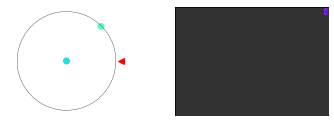

In [25]:
N = 10 #number of oscillators
K = 0.3 #coupling


x1 = np.ones(N)
x0 = np.linspace(0,2*np.pi,N)
v0 = np.ones(N) # initial state (equilibrium)
#x0[19] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 40.0, 0.01)

x = odeint(Kuramoto,x0,t, args =(v0,K))
x_locations = [np.random.rand() for i in range(len(x0))]
y_locations = [2*(np.random.rand()-0.5) for i in range(len(x0))]

shuffled_list = np.linspace(0, 1, len(x0))
random.shuffle(shuffled_list)

color = cm.rainbow(shuffled_list)


fig1, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
   # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
#xr.set_box_aspect(2 )
axr.set_xlim(( 0, 1))
axr.set_ylim((-1, 1))
axl.set_xlim(( -1.2, 1.3))
axl.set_ylim((-1.1, 1.1))

axr.yaxis.set_visible(False)
axr.xaxis.set_visible(False)
axr.set_facecolor((0.1975,0.1975, 0.1975))
axl.yaxis.set_visible(False)
axl.xaxis.set_visible(False)
axl.axis('off')
#axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
circle_x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(circle_x), np.sin(circle_x), "k", lw=0.3)
point1, = axl.plot(1.1, 0, "<",c = 'r')
#line_l = axl.scatter([0.5], [0.5], cmap="rainbow")
line_l = axl.scatter(x0, x0, c =shuffled_list,  cmap="rainbow")

# draw full curve to set view limits in right Axes
#sine, = axr.plot(x, np.sin(x))
line_r = axr.scatter(x0/x0, x0/x0, c = shuffled_list,  cmap="rainbow")
#line_r, = axr.plot([], [], '.', linewidth=2, markersize=17)
# initialization function: plot the background of each frame
def init():
    #x = np.linspace(0, i, int(i * 25 / np.pi))
    #sine.set_data(x, np.sin(x))
    #x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    line_r.set_data([], [])
    return  point, line_r

# animation function. This is called sequentially
def animate2(i):
    current_locations = x[i]
    k = 0
    #line_r.set_data([],[])
    circle_x = []
    circle_y = []
    
    num_shining_dots = 0
    x_location_list = []
    y_location_list = []
    k_list = []
    for each_dot in current_locations:
        
        if np.linalg.norm(each_dot%(2*np.pi)) <0.05:
            #print(each_dot,each_dot%2*np.pi, k)
            x_location_list += [x_locations[k]]
            y_location_list += [y_locations[k]]
            k_list += [k]
            #line_r.set_data(x_locations[k], y_locations[k])
            #line_r.set_color(color[k])
            num_shining_dots += 1
        #if k == 0:
        circle_x += [np.cos(each_dot)]
        circle_y += [np.sin(each_dot)]
        k += 1
    #if num_shining_dots ==0:
        #line_r.set_offsets(np.transpose(np.array([[], []])))
    line_r.set_offsets(np.transpose(np.array([x_location_list, y_location_list])))
    line_r.set_array(shuffled_list[k_list])
    line_l.set_offsets(np.transpose(np.array([circle_x, circle_y])))
    line_l.set_array(shuffled_list)#, cmap="jet")
    return line_l, line_r

# call the animator. blit=True means only re-draw the parts that have changed.
anima_2 = animation.FuncAnimation(fig1, animate2,
                               frames=2200, interval=10, blit=False)

In [26]:
#HTML(anima_2.to_html5_video())
anima_2

Do you notice that the fireflies sync together after a while? This is because fireflies look at each other for a bit and adjust their blinks. If their friendship coupling is high enough, they all start to blink at the same time.

<ipython-input-27-f9d51b255e17>:51: RuntimeWarning: invalid value encountered in true_divide
  line_r = axr.scatter(x0/x0, x0/x0, c = shuffled_list,  cmap="rainbow")


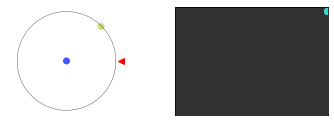

In [27]:
N = 10 #number of oscillators
K = 0.3 #friendship coupling


x1 = np.ones(N)
x0 = np.linspace(0,2*np.pi,N)
v0 = np.ones(N) # initial state (equilibrium)
#x0[19] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 50.0, 0.01)

x = odeint(Kuramoto,x0,t, args =(v0,K))
x_locations = [np.random.rand() for i in range(len(x0))]
y_locations = [2*(np.random.rand()-0.5) for i in range(len(x0))]

shuffled_list = np.linspace(0, 1, len(x0))
random.shuffle(shuffled_list)

color = cm.rainbow(shuffled_list)


fig1, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
   # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
#xr.set_box_aspect(2 )
axr.set_xlim(( 0, 1))
axr.set_ylim((-1, 1))
axr.set_facecolor((0.1975,0.1975, 0.1975))
axl.set_xlim(( -1.2, 1.3))
axl.set_ylim((-1.1, 1.1))

axr.yaxis.set_visible(False)
axr.xaxis.set_visible(False)
axl.yaxis.set_visible(False)
axl.xaxis.set_visible(False)
axl.axis('off')
#axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
circle_x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(circle_x), np.sin(circle_x), "k", lw=0.3)
point1, = axl.plot(1.1, 0, "<",c = 'r')
#line_l = axl.scatter([0.5], [0.5], cmap="rainbow")
line_l = axl.scatter(x0, x0, c =shuffled_list,  cmap="rainbow")

# draw full curve to set view limits in right Axes
#sine, = axr.plot(x, np.sin(x))
line_r = axr.scatter(x0/x0, x0/x0, c = shuffled_list,  cmap="rainbow")
#line_r, = axr.plot([], [], '.', linewidth=2, markersize=17)
# initialization function: plot the background of each frame
def init():
    #x = np.linspace(0, i, int(i * 25 / np.pi))
    #sine.set_data(x, np.sin(x))
    #x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    line_r.set_data([], [])
    return  point, line_r

# animation function. This is called sequentially
def animate2(i):
    current_locations = x[i]
    k = 0
    #line_r.set_data([],[])
    circle_x = []
    circle_y = []
    
    num_shining_dots = 0
    x_location_list = []
    y_location_list = []
    k_list = []
    for each_dot in current_locations:
        
        if np.linalg.norm(each_dot%(2*np.pi)) <0.05:
            #print(each_dot,each_dot%2*np.pi, k)
            x_location_list += [x_locations[k]]
            y_location_list += [y_locations[k]]
            k_list += [k]
            #line_r.set_data(x_locations[k], y_locations[k])
            #line_r.set_color(color[k])
            num_shining_dots += 1
        #if k == 0:
        circle_x += [np.cos(each_dot)]
        circle_y += [np.sin(each_dot)]
        k += 1
    #if num_shining_dots ==0:
        #line_r.set_offsets(np.transpose(np.array([[], []])))
    line_r.set_offsets(np.transpose(np.array([x_location_list, y_location_list])))
    line_r.set_array(shuffled_list[k_list])
    line_l.set_offsets(np.transpose(np.array([circle_x, circle_y])))
    line_l.set_array(shuffled_list)#, cmap="jet")
    return line_l, line_r

# call the animator. blit=True means only re-draw the parts that have changed.
anima_3 = animation.FuncAnimation(fig1, animate2,
                               frames=4000, interval=5, blit=False)

In [28]:
#HTML(anima_3.to_html5_video())
anima_3

#### Acknowledgements

Special thanks to Jake Van Der Plaas and Louis Tiao for their tutorials on matplotlib animations.

1. http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/
2. http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

And of course, the many researchers that have worked on the Kuramoto model to understand fireflies, synchronization and many other coupled oscillator systems. 

https://en.wikipedia.org/wiki/Kuramoto_model